# Import Packages for EDA

We chose the following packages to conduct our EDA.

In [125]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from pandas.plotting import scatter_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Connect to AWS Server

Use username and password to connect to server.

In [126]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()


In [127]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"analysisFeatures\" ", con=conn)
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50) 
df.head()

,id_student,code_module,code_presentation,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,pass_fail_ind,reg_period,date_registration,date_unregistration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
0,3733,DDD,2013J,STEM,261,J,2013,0,Withdrawn,None,QUARTERB4,-68.0,-8.0,N,M,55<=,South Region,HE Qualification,90-100%,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6516,AAA,2014J,SocialScience,269,J,2014,0,Pass,PASS,QUARTERB4,-52.0,NaN,N,M,55<=,Scotland,HE Qualification,80-90%,60,256.0,790.0,389.0,715.0,641.0,2791.0,0.0,63.5,63.5,0.0,100.0,0.0,0.0
2,8462,DDD,2013J,STEM,261,J,2013,0,Withdrawn,None,LONGB4,-137.0,119.0,N,M,55<=,London Region,HE Qualification,30-40%,90,81.0,442.0,123.0,0.0,0.0,646.0,0.0,34.9,34.9,0.0,40.0,0.0,0.0
3,8462,DDD,2014J,STEM,262,J,2014,1,Withdrawn,None,QUARTERB4,-38.0,18.0,N,M,55<=,London Region,HE Qualification,30-40%,60,0.0,10.0,0.0,0.0,0.0,10.0,0.0,43.0,43.0,0.0,50.0,4.0,0.0
4,11391,AAA,2013J,SocialScience,268,J,2013,0,Pass,PASS,LONGB4,-159.0,NaN,N,M,55<=,East Anglian Region,HE Qualification,90-100%,240,98.0,431.0,99.0,85.0,221.0,934.0,0.0,82.4,82.4,0.0,100.0,0.0,0.0


In [128]:
#investigate data types of all the files
df.dtypes

id_student                      int64
code_module                    object
code_presentation              object
module_domain                  object
module_presentation_length      int64
term                           object
year                           object
num_of_prev_attempts            int64
final_result                   object
pass_fail_ind                  object
reg_period                     object
date_registration             float64
date_unregistration           float64
disability                     object
gender                         object
age_band                       object
region                         object
highest_education              object
imd_band                       object
studied_credits                 int64
b4_sum_clicks                 float64
q1_sum_clicks                 float64
q2_sum_clicks                 float64
q3_sum_clicks                 float64
q4_sum_clicks                 float64
allclicks                     float64
cma_assmt_sc

Scotland                3446
East Anglian Region     3340
London Region           3216
South Region            3092
North Western Region    2906
West Midlands Region    2582
South West Region       2436
East Midlands Region    2365
South East Region       2111
Wales                   2086
Yorkshire Region        2006
North Region            1823
Ireland                 1184
Name: region, dtype: int64


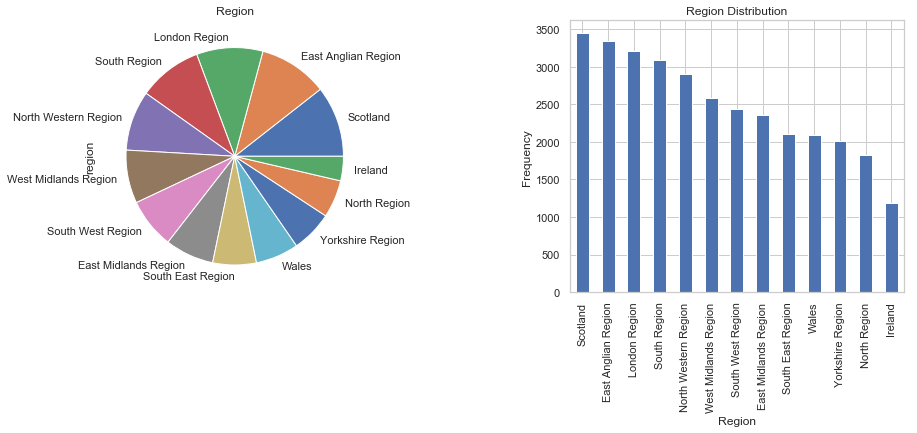

In [56]:
#data distribution of regions
presentation_counts = df['region'].value_counts()
print (presentation_counts)


#created pie chart and histogram chart. Compare both visuals to see which is better at displaying the data.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
presentation_counts.plot(kind='pie')
plt.title('Region')

plt.subplot(1,2,2)
presentation_counts.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Region Distribution')

# add more space between the two plots
plt.subplots_adjust(wspace=0.5)

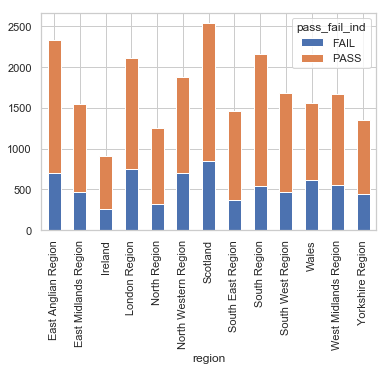

In [57]:
df.groupby(['region','pass_fail_ind']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

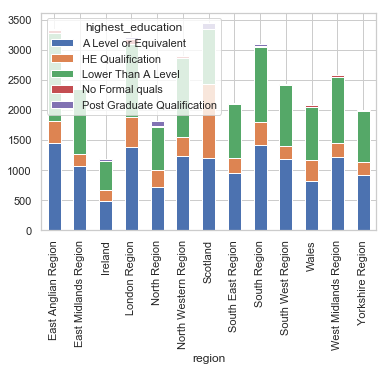

In [58]:
df.groupby(['region','highest_education']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

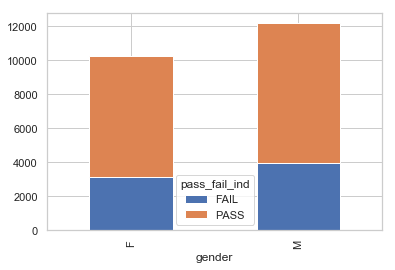

In [59]:
df.groupby(['gender', 'pass_fail_ind']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


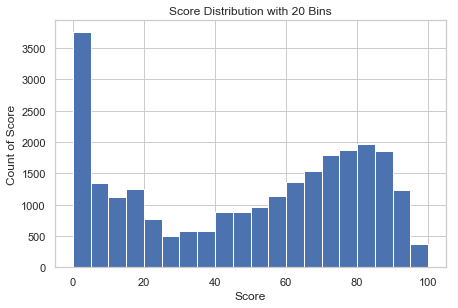

In [60]:
#create bins for score distribution

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['tma_cma_assmt_score'], bins=20, range=(df['tma_cma_assmt_score'].min(),df['tma_cma_assmt_score'].max()))
plt.title('Score Distribution with 20 Bins')
plt.xlabel('Score')
plt.ylabel('Count of Score')
plt.show()

In [10]:
# extract everything from 'table_name' into a dataframe
df2 = pd_sql.read_sql(f"select * from public.\"studentAssessmentFULLSTG\" ", con=conn).reset_index()
df2.head()  

,index,id_assessment,id_student,date_submitted,is_banked,scoretxt,score,code_module,code_presentation,assessment_type,final_sub_date,weight
0,0,1759,6516,51,0,48,48.0,AAA,2014J,TMA,54.0,20.0
1,1,1760,6516,116,0,63,63.0,AAA,2014J,TMA,117.0,20.0
2,2,1758,6516,17,0,60,60.0,AAA,2014J,TMA,19.0,10.0
3,3,1761,6516,164,0,61,61.0,AAA,2014J,TMA,166.0,20.0
4,4,1762,6516,210,0,77,77.0,AAA,2014J,TMA,215.0,30.0


In [62]:
#count the number of unique student ids
df['id_student'].count()

32593

In [61]:
df['id_student'].nunique()

28785

In [63]:
df2.head()

,index,id_assessment,id_student,date_submitted,is_banked,scoretxt,score,code_module,code_presentation,assessment_type,final_sub_date,weight
0,0,1759,6516,51,0,48,48.0,AAA,2014J,TMA,54.0,20.0
1,1,1760,6516,116,0,63,63.0,AAA,2014J,TMA,117.0,20.0
2,2,1758,6516,17,0,60,60.0,AAA,2014J,TMA,19.0,10.0
3,3,1761,6516,164,0,61,61.0,AAA,2014J,TMA,166.0,20.0
4,4,1762,6516,210,0,77,77.0,AAA,2014J,TMA,215.0,30.0


In [65]:
#count the number of semesters
df.groupby(['year', 'term', 'module_domain'])['id_student'].count()

year  term  module_domain
2013  B     STEM             2917
            SocialScience    1767
      J     STEM             5273
            SocialScience    3572
2014  B     STEM             5358
            SocialScience    2446
      J     STEM             7854
            SocialScience    3406
Name: id_student, dtype: int64

In [ ]:
#count the number of classes
df2['code_module'].nunique()

In [17]:
#count of null values in chart
df.isnull().sum()

level_0                           0
index                             0
id_student                        0
module_domain                     0
module_presentation_length        0
term                              0
year                              0
num_of_prev_attempts              0
pass_fail_ind                 10156
date_registration                45
disability                        0
gender                            0
age_band                          0
region                            0
highest_education                 0
imd_band                       1111
studied_credits                   0
b4_sum_clicks                  6800
q1_sum_clicks                  6800
q2_sum_clicks                  6800
q3_sum_clicks                  6800
q4_sum_clicks                  6800
allclicks                      6800
cma_assmt_score                6800
tma_assmt_score                6823
tma_cma_assmt_score            6823
final_exam                     6800
total_weight                

In [ ]:
#distribution of gender based on course genre
df.groupby(['code_module']).count()

In [ ]:
df.head()

In [86]:
df.columns

Index(['id_student', 'code_module', 'code_presentation', 'module_domain',
       'module_presentation_length', 'term', 'year', 'num_of_prev_attempts',
       'final_result', 'pass_fail_ind', 'reg_period', 'date_registration',
       'date_unregistration', 'disability', 'gender', 'age_band', 'region',
       'highest_education', 'imd_band', 'studied_credits', 'b4_sum_clicks',
       'q1_sum_clicks', 'q2_sum_clicks', 'q3_sum_clicks', 'q4_sum_clicks',
       'allclicks', 'cma_assmt_score', 'tma_assmt_score',
       'tma_cma_assmt_score', 'final_exam', 'total_weight', 'is_reenrolled',
       'final_exam_score'],
      dtype='object')

In [129]:
df[[ 'b4_sum_clicks','q1_sum_clicks', 'q2_sum_clicks', 'q3_sum_clicks', 'q4_sum_clicks', 'allclicks']].describe()

,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks
count,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000,25793.000000
mean,79.200520,528.206568,278.671229,332.652115,304.142597,1522.873028
std,139.738365,602.251810,397.554155,477.088998,478.721574,1778.435282
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,156.000000,47.000000,18.000000,0.000000,392.000000
50%,31.000000,339.000000,142.000000,160.000000,122.000000,907.000000
75%,94.000000,683.000000,342.000000,447.000000,398.000000,1991.000000
max,3731.000000,9616.000000,7592.000000,6535.000000,12541.000000,24139.000000


In [107]:
def min_max_values(col):
    ''' the function takes the colum name as the argument
        and returns the top & bottom observation in that dataframe
    '''
    top = df[col].idxmax()
    top_obs = pd.DataFrame(df.loc[top])
    
    bottom = df[col].idxmin()
    bot_obs = pd.DataFrame(df.loc[bottom])
    
    min_max_obs = pd.concat([top_obs, bot_obs], axis=1)
    
    return min_max_obs

In [108]:
min_max_values ('allclicks')

,492,4431
id_student,80868,382339
code_module,CCC,DDD
code_presentation,2014J,2013B
module_domain,STEM,STEM
module_presentation_length,269,240
term,J,B
year,2014,2013
num_of_prev_attempts,0,1
final_result,Pass,Fail
pass_fail_ind,PASS,FAIL


In [123]:
distribution = df.groupby('allclicks').size()

In [124]:
 df.groupby('allclicks').size()

allclicks
1.0        12
2.0         7
3.0        14
4.0        19
5.0        12
6.0         9
7.0        11
8.0        11
9.0        12
10.0       10
11.0        5
12.0       12
13.0       10
14.0       12
15.0        5
16.0        5
17.0        7
18.0       10
19.0       20
20.0       17
21.0       15
22.0       11
23.0       11
24.0        6
25.0       11
26.0       14
27.0       11
28.0        7
29.0       15
30.0        7
           ..
14594.0     1
14807.0     1
14838.0     1
14841.0     1
15002.0     1
15018.0     1
15173.0     1
15205.0     1
15300.0     1
15361.0     1
15559.0     1
15716.0     1
15729.0     1
15829.0     1
15858.0     1
15931.0     1
16227.0     1
16372.0     1
16440.0     1
17246.0     1
17481.0     1
17825.0     1
18039.0     1
19126.0     1
19415.0     1
19461.0     1
19734.0     1
20391.0     1
21123.0     1
24139.0     1
Length: 5380, dtype: int64

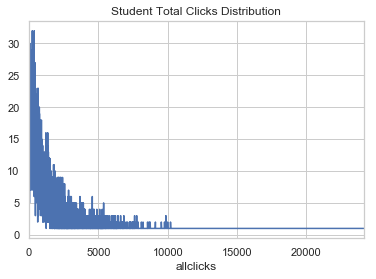

In [118]:
distribution.plot(title ='Student Total Clicks Distribution')

In [112]:
df.groupby(['gender', 'module_domain']).count()

id_student  code_module  code_presentation  \
gender module_domain                                               
F      STEM                 5370         5370               5370   
       SocialScience        9348         9348               9348   
M      STEM                16032        16032              16032   
       SocialScience        1843         1843               1843   

                      module_presentation_length   term   year  \
gender module_domain                                             
F      STEM                                 5370   5370   5370   
       SocialScience                        9348   9348   9348   
M      STEM                                16032  16032  16032   
       SocialScience                        1843   1843   1843   

                      num_of_prev_attempts  final_result  pass_fail_ind  \
gender module_domain                                                      
F      STEM                           5370          5370           3300   
       SocialScience                  9348          9348           6932   
M      STEM                          16032         16032          10752   
       SocialScience                  1843          1843           1453   

                      reg_period  date_registration  date_unregistration  \
gender module_domain                                                       
F      STEM                 5341               5359                 2047   
       SocialScience        9320               9340                 2404   
M      STEM                15968              16007                 5233   
       SocialScience        1837               1842                  388   

                      disability  age_band  region  highest_education  \
gender module_domain                                                    
F      STEM                 5370      5370    5370               5370   
       SocialScience        9348      9348    9348               9348   
M      STEM                16032     16032   16032              16032   
       SocialScience        1843      1843    1843               1843   

                      imd_band  studied_credits  b4_sum_clicks  q1_sum_clicks  \
gender module_domain                                                            
F      STEM               5370             5370           4228           4228   
       SocialScience      9348             9348           7373           7373   
M      STEM              16032            16032          12697          12697   
       SocialScience      1843             1843           1495           1495   

                      q2_sum_clicks  q3_sum_clicks  q4_sum_clicks  allclicks  \
gender module_domain                                                           
F      STEM                    4228           4228           4228       4228   
       SocialScience           7373           7373           7373       7373   
M      STEM                   12697          12697          12697      12697   
       SocialScience           1495           1495           1495       1495   

                      cma_assmt_score  tma_assmt_score  tma_cma_assmt_score  \
gender module_domain                                                          
F      STEM                      4228             4224                 4224   
       SocialScience             7373             7365                 7365   
M      STEM                     12697            12687                12687   
       SocialScience             1495             1494                 1494   

                      final_exam  total_weight  is_reenrolled  \
gender module_domain                                            
F      STEM                 4228          4228           4228   
       SocialScience        7373          7373           7373   
M      STEM                12697         12697          12697   
       SocialScience        1495          1495           1495   

                      final_exam_sc

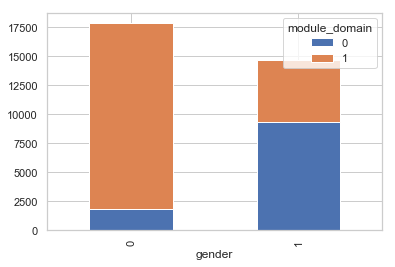

In [36]:
df.groupby(['gender', 'module_domain']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

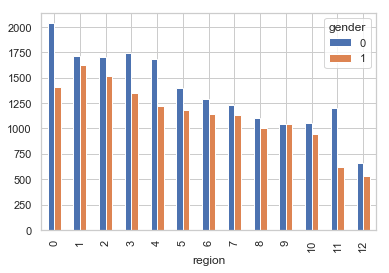

In [37]:
df.groupby(['region', 'gender']).size().unstack().plot(kind='bar')
plt.show()

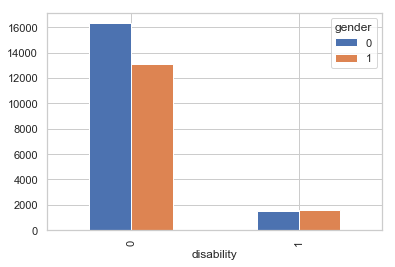

In [49]:
df.groupby(['disability', 'gender']).size().unstack().plot(kind='bar')
plt.show()

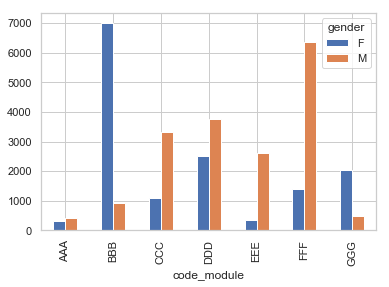

In [66]:
df.groupby(['code_module', 'gender']).size().unstack().plot(kind='bar')
plt.show()

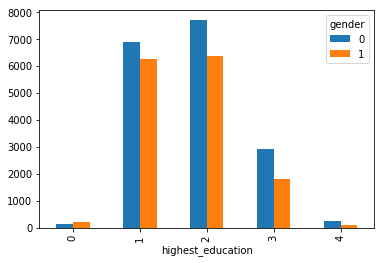

In [22]:
#grouping education by gender
df.groupby(['highest_education', 'gender']).size().unstack().plot(kind='bar')
plt.show()

# Scatter Matrix for All the Features in Our Finalized Dataset

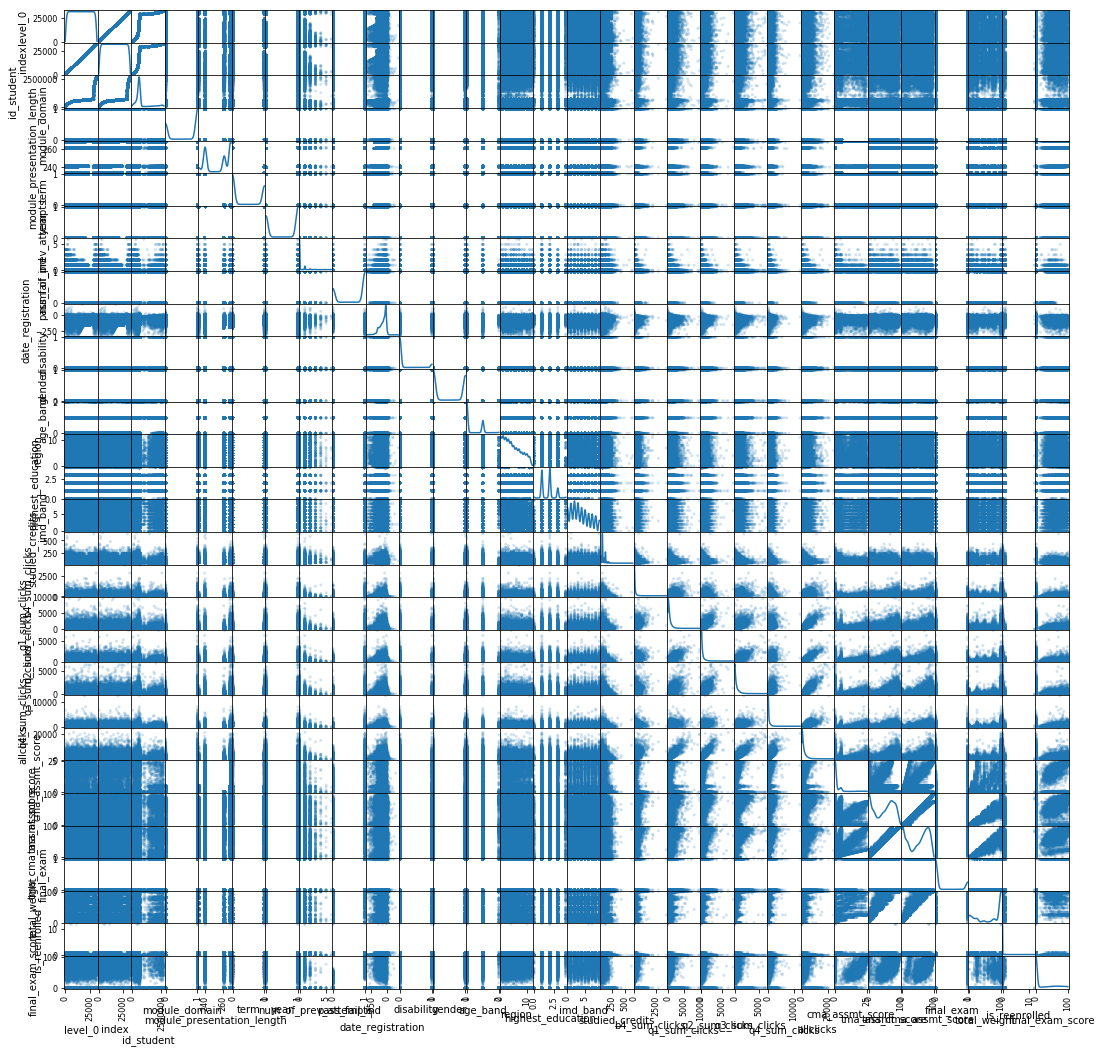

In [23]:
X = df[df.columns.values.tolist()].sample(frac=0.20, replace=False, random_state=1)
#20% of the data for the scatter matrix
scatter_matrix(df, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [68]:

#distribution of gender based on course genre
df.groupby(['code_presentation']).count()

,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,pass_fail_ind,reg_period,date_registration,date_unregistration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,q1_sum_clicks,q2_sum_clicks,q3_sum_clicks,q4_sum_clicks,allclicks,cma_assmt_score,tma_assmt_score,tma_cma_assmt_score,final_exam,total_weight,is_reenrolled,final_exam_score
code_presentation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013B,4684,4684,4684,4684,4684,4684,4684,4684,3336,4676,4676,1347,4684,4684,4684,4684,4684,4684,4684,3801,3801,3801,3801,3801,3801,3801,3793,3793,3801,3801,3801,3801
2013J,8845,8845,8845,8845,8845,8845,8845,8845,6476,8808,8835,2376,8845,8845,8845,8845,8845,8845,8845,7081,7081,7081,7081,7081,7081,7081,7075,7075,7081,7081,7081,7081
2014B,7804,7804,7804,7804,7804,7804,7804,7804,5191,7786,7786,2610,7804,7804,7804,7804,7804,7804,7804,5989,5989,5989,5989,5989,5989,5989,5986,5986,5989,5989,5989,5989
2014J,11260,11260,11260,11260,11260,11260,11260,11260,7434,11196,11251,3739,11260,11260,11260,11260,11260,11260,11260,8922,8922,8922,8922,8922,8922,8922,8916,8916,8922,8922,8922,8922


In [70]:
cd_counts= df['code_presentation'].value_counts()
print('Code Presentation')
print(cd_counts)

Code Presentation
2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: code_presentation, dtype: int64


In [ ]:

# Create a histogram showing the frequency of each bachelors degree major in the 1st, 2nd, and 3rd majors. 

plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
bachelor_1_counts.plot(kind='bar')
plt.ylabel('Frequency')
plt.title('1st Major Categories')
plt.suptitle('Bachelors Degree Majors', fontsize=14)

plt.subplot(1,3,2)
bachelor_2_counts.plot(kind='bar')
plt.title('2nd Major Categories')

plt.subplot(1,3,3)
bachelor_3_counts.plot(kind='bar')
plt.title('3rd Major Categories')

# add more space between the title and the plots
plt.subplots_adjust(top=0.8)

In [ ]:
df_test = df[['index','id_student', 'tma_cma_assmt_score', 'code_module', 'code_presentation', 'module_domain', 'final_result']]

In [ ]:
df_test.head()

In [ ]:
scatter_matrix(df_test, alpha=0.2, figsize=(18,18), diagonal='kde')
plt.show()

In [ ]:
disconnectDB()